<a href="https://colab.research.google.com/github/serskinek/seed-labs/blob/master/Latest_Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Method Description

Step 1: Data preprocessing:
All features are made numerical using one-Hot-encoding. The features are scaled to avoid features with large values that may weigh too much in the results.


Importing important libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import sklearn

## Load the Dataset

In [ ]:


col_name = ["flow_duration","Header_Length","Protocol Type","Duration","Rate",
    "Srate","Drate","fin_flag_number","syn_flag_number","rst_flag_number","psh_flag_number",
    "ack_flag_number","ece_flag_number","cwr_flag_number","ack_count","syn_count",
    "fin_count","urg_count","rst_count","HTTP",
    "HTTPS","DNS","Telnet","SMTP","SSH",
    "IRC","TCP","UDP","DHCP",
    "ARP","ICMP","IPv","LLC",
    "Tot sum","Min","Max",
    "AVG","std","Tot size","IAT","Number", "Magnitude", "Radius", "Covariance","Variance", "weight","label"]


df = pd.read_csv("Cic 1 2023 - Copy.csv" , header =None, names= col_name)



    # shape, this gives the dimensions of the dataset
print('Dimensions of the data:', df.shape)

Dimensions of the data: (238687, 47)


In [ ]:
 df.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,std,Tot size,IAT,Number,Magnitude,Radius,Covariance,Variance,weight,label
0,0.000000,54.00,6.00,64.00,0.329807,0.329807,0.0,1,0,1,...,0.000000,54.00,83343831.92,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood
1,0.000000,57.04,6.33,64.00,4.290556,4.290556,0.0,0,0,0,...,2.822973,57.04,82926067.47,9.5,10.464666,4.010353,160.987842,0.05,141.55,DoS-TCP_Flood
2,0.000000,0.00,1.00,64.00,33.396799,33.396799,0.0,0,0,0,...,0.000000,42.00,83127993.93,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
3,0.328175,76175.00,17.00,64.00,4642.133010,4642.133010,0.0,0,0,0,...,0.000000,50.00,83015696.38,9.5,10.000000,0.000000,0.000000,0.00,141.55,DoS-UDP_Flood
4,0.117320,101.73,6.11,65.91,6.202211,6.202211,0.0,0,1,0,...,23.113111,57.88,82972999.18,9.5,11.346876,32.716243,3016.808286,0.19,141.55,DoS-SYN_Flood


In [ ]:
df.describe()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,AVG,std,Tot size,IAT,Number,Magnitude,Radius,Covariance,Variance,weight
count,238687.000000,2.386870e+05,238687.000000,238687.000000,2.386870e+05,2.386870e+05,238687.000000,238687.000000,238687.000000,238687.000000,...,238687.000000,238687.000000,238687.000000,2.386870e+05,238687.000000,238687.000000,238687.000000,2.386870e+05,238687.000000,238687.000000
mean,5.907665,7.700997e+04,9.052570,66.345189,9.384479e+03,9.384479e+03,0.000005,0.086532,0.206132,0.090646,...,125.176224,33.734815,125.382852,8.315222e+07,9.497295,13.139741,47.667800,3.197953e+04,0.097020,141.480307
std,327.743332,4.596463e+05,8.902223,14.025283,1.007839e+05,1.007839e+05,0.001765,0.281148,0.404527,0.287106,...,242.662004,163.853279,244.789519,1.710828e+07,0.821824,8.657497,231.716734,4.478592e+05,0.234105,21.137449
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,42.000000,0.000000,42.000000,0.000000e+00,1.000000,9.165151,0.000000,0.000000e+00,0.000000,1.000000
25%,0.000000,5.400000e+01,6.000000,64.000000,2.092589e+00,2.092589e+00,0.000000,0.000000,0.000000,0.000000,...,50.000000,0.000000,50.000000,8.307157e+07,9.500000,10.000000,0.000000,0.000000e+00,0.000000,141.550000
50%,0.000000,5.400000e+01,6.000000,64.000000,1.583922e+01,1.583922e+01,0.000000,0.000000,0.000000,0.000000,...,54.000000,0.000000,54.000000,8.312452e+07,9.500000,10.392305,0.000000,0.000000e+00,0.000000,141.550000
75%,0.104513,3.368950e+02,14.120000,64.000000,1.191466e+02,1.191466e+02,0.000000,0.000000,0.000000,0.000000,...,54.052576,0.377989,54.060000,8.334389e+07,9.500000,10.396749,0.505921,1.405767e+00,0.080000,141.550000
max,68430.712220,9.809700e+06,47.000000,255.000000,7.340032e+06,7.340032e+06,0.848465,1.000000,1.000000,1.000000,...,7861.105079,10996.260910,13098.000000,1.676394e+08,14.500000,120.975449,15551.061320,1.372844e+08,1.000000,244.600000


In [ ]:
#checking for null value
df.isnull().sum()

flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
std                0
Tot size           0
IAT                0
Number             0
Magnitude          0
Radius             0
Covariance         0
Variance           0
weight             0
label              0
dtype: int64

## Label distribution.

In [ ]:
print('Label distribution :')
print(df['label'].value_counts())
print()

Label distribution :
DDoS-ICMP_Flood            36554
DDoS-UDP_Flood             27626
DDoS-TCP_Flood             23149
DDoS-PSHACK_Flood          21210
DDoS-SYN_Flood             20739
DDoS-RSTFINFlood           20669
DDoS-SynonymousIP_Flood    18189
DoS-UDP_Flood              16957
DoS-TCP_Flood              13630
DoS-SYN_Flood              10275
BenignTraffic               5600
Mirai-greeth_flood          5016
Mirai-udpplain              4661
Mirai-greip_flood           3758
DDoS-ICMP_Fragmentation     2377
MITM-ArpSpoofing            1614
DDoS-ACK_Fragmentation      1505
DDoS-UDP_Fragmentation      1484
DNS_Spoofing                 925
Recon-HostDiscovery          697
Recon-OSScan                 517
Recon-PortScan               430
DoS-HTTP_Flood               414
VulnerabilityScan            210
DDoS-HTTP_Flood              169
DDoS-SlowLoris               106
DictionaryBruteForce          63
SqlInjection                  31
BrowserHijacking              30
CommandInjection      

## Bar graph of label distribution

<Axes: >

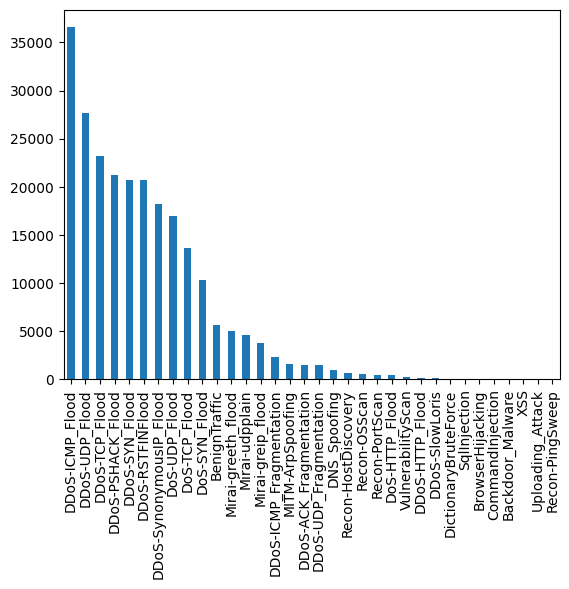

In [ ]:
(df['label'].value_counts()).plot.bar()

## Checking for Categiorical features in the dataset


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238687 entries, 0 to 238686
Data columns (total 47 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   flow_duration    238687 non-null  float64
 1   Header_Length    238687 non-null  float64
 2   Protocol Type    238687 non-null  float64
 3   Duration         238687 non-null  float64
 4   Rate             238687 non-null  float64
 5   Srate            238687 non-null  float64
 6   Drate            238687 non-null  float64
 7   fin_flag_number  238687 non-null  int64  
 8   syn_flag_number  238687 non-null  int64  
 9   rst_flag_number  238687 non-null  int64  
 10  psh_flag_number  238687 non-null  int64  
 11  ack_flag_number  238687 non-null  int64  
 12  ece_flag_number  238687 non-null  int64  
 13  cwr_flag_number  238687 non-null  int64  
 14  ack_count        238687 non-null  float64
 15  syn_count        238687 non-null  float64
 16  fin_count        238687 non-null  floa

In [ ]:
print('Categorical data:')
for col_name in df.columns:
    if df[col_name].dtypes == 'object' :
        unique_cat = len(df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

Categorical data:
Feature 'label' has 34 categories


Changing Label features into numerical values

In [ ]:
labeldf=df['label']
labeldf

0          DDoS-RSTFINFlood
1             DoS-TCP_Flood
2           DDoS-ICMP_Flood
3             DoS-UDP_Flood
4             DoS-SYN_Flood
                ...        
238682     DDoS-RSTFINFlood
238683    DDoS-PSHACK_Flood
238684       DDoS-SYN_Flood
238685    DDoS-PSHACK_Flood
238686      DDoS-ICMP_Flood
Name: label, Length: 238687, dtype: object

## Rename label column
* 0 : Normal
* 1 : DDoS
* 2 : DoS
* 3 : Recon and Scanning
* 4 : Malicious Software and Exploits

In [ ]:
# take label column
labeldf=df['label']
# change the label column
newlabeldf=labeldf.replace({ 'BenignTraffic' : 0,  'DDoS-ICMP_Flood': 1 , 'DDoS-UDP_Flood': 1 , 'DDoS-TCP_Flood': 1 , 'DDoS-PSHACK_Flood': 1 , 'DDoS-SYN_Flood': 1 , 'DDoS-RSTFINFlood': 1 ,
                              'DDoS-SynonymousIP_Flood': 1 , 'DDoS-ICMP_Fragmentation': 1 , 'DDoS-ACK_Fragmentation': 1 ,
                              'DDoS-UDP_Fragmentation': 1 , 'DDoS-HTTP_Flood': 1 , 'DDoS-SlowLoris': 1 , 'DDoS-UDP_Fragmentation': 1 ,
                           'DoS-UDP_Flood': 2, 'DoS-TCP_Flood' :2 , 'DoS-SYN_Flood': 2, 'DoS-HTTP_Flood': 2 ,
                           'Recon-HostDiscovery' : 3 , 'Recon-OSScan' : 3 , 'Recon-PortScan' : 3 ,  'Recon-PingSweep' : 3 ,
                            'Mirai-greeth_flood' : 4 , 'Mirai-udpplain' : 4 , 'Mirai-greip_flood' : 4 , 'DictionaryBruteForce' : 4 , 'SqlInjection' : 4 , 'BrowserHijacking' : 4,
                            'CommandInjection' : 4 , 'Backdoor_Malware' : 4 , 'XSS' : 4 , 'Uploading_Attack' :4 , 'MITM-ArpSpoofing' : 4 , 'DNS_Spoofing' : 4 ,
                              'VulnerabilityScan' : 4}, inplace=True)


print(df['label'].head())

0    1
1    2
2    1
3    2
4    2
Name: label, dtype: int64


<Axes: >

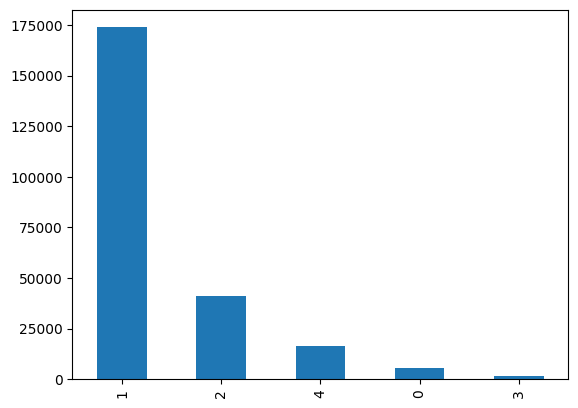

In [ ]:
(df['label'].value_counts()).plot.bar()

In [ ]:
df['label'].value_counts()

1    173777
2     41276
4     16384
0      5600
3      1650
Name: label, dtype: int64

In [ ]:
df.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,std,Tot size,IAT,Number,Magnitude,Radius,Covariance,Variance,weight,label
0,0.000000,54.00,6.00,64.00,0.329807,0.329807,0.0,1,0,1,...,0.000000,54.00,83343831.92,9.5,10.392305,0.000000,0.000000,0.00,141.55,1
1,0.000000,57.04,6.33,64.00,4.290556,4.290556,0.0,0,0,0,...,2.822973,57.04,82926067.47,9.5,10.464666,4.010353,160.987842,0.05,141.55,2
2,0.000000,0.00,1.00,64.00,33.396799,33.396799,0.0,0,0,0,...,0.000000,42.00,83127993.93,9.5,9.165151,0.000000,0.000000,0.00,141.55,1
3,0.328175,76175.00,17.00,64.00,4642.133010,4642.133010,0.0,0,0,0,...,0.000000,50.00,83015696.38,9.5,10.000000,0.000000,0.000000,0.00,141.55,2
4,0.117320,101.73,6.11,65.91,6.202211,6.202211,0.0,0,1,0,...,23.113111,57.88,82972999.18,9.5,11.346876,32.716243,3016.808286,0.19,141.55,2


## Splitting the Dataset into Training set and Test set

In [ ]:
#x is the independent variable
#y is the dependent variable/target varible
X = df.drop('label', axis = 1)
y = df['label']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Building Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state=0, max_depth=10)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for train dataset
y_train_pred = clf.predict(X_train)


In [ ]:
from sklearn.metrics import classification_report

# y_true is the true labels of the test set
# y_pred is the predicted labels of the test set
print(classification_report(y_train , y_train_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      4482
           1       1.00      1.00      1.00    138909
           2       1.00      1.00      1.00     33140
           3       0.95      0.77      0.85      1311
           4       0.99      0.98      0.98     13107

    accuracy                           1.00    190949
   macro avg       0.97      0.95      0.96    190949
weighted avg       1.00      1.00      1.00    190949



In [ ]:
pd.DataFrame({"y_train": y_train, "y_pred":y_train_pred})

,y_train,y_pred
235276,1,1
39240,1,1
27125,2,2
212597,2,2
7631,1,1
...,...,...
119879,4,4
103694,1,1
131932,1,1
146867,1,1


In [ ]:
#Predict the response for test dataset
y_test_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

# y_true is the true labels of the test set
# y_pred is the predicted labels of the test set
print(classification_report(y_test , y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1118
           1       1.00      1.00      1.00     34868
           2       1.00      1.00      1.00      8136
           3       0.89      0.74      0.81       339
           4       0.98      0.97      0.97      3277

    accuracy                           0.99     47738
   macro avg       0.95      0.93      0.94     47738
weighted avg       0.99      0.99      0.99     47738



In [ ]:
pd.DataFrame(clf.feature_importances_ , index=df.drop('label' , axis = 1).columns)

,0
flow_duration,0.004679
Header_Length,0.000906
Protocol Type,0.033747
Duration,0.000418
Rate,0.000051
Srate,0.003256
Drate,0.000000
fin_flag_number,0.000000
syn_flag_number,0.000031
rst_flag_number,0.000000


## Model Hyperparmater Tuning

In [ ]:
#New and replace
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': list(range(4, 21, 4)),
    'min_samples_split': [10, 20, 30, 40, 50],
    # Add other hyperparameters and their ranges as needed
}
random_search_tree = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=0),  # Replace with your chosen algorithm
    param_distributions=param_grid,
    cv=5,  # Number of folds for cross-validation
    scoring='f1_macro', #scoring metric for evaluation
    verbose=2,  # Increase for more verbose output (optional)
    n_jobs=-1,  # Use all available CPU cores (optional)
)
random_search_tree.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'max_depth': [4, 8, 12, 16, 20],
                                        'min_samples_split': [10, 20, 30, 40,
                                                              50]},
                   scoring='f1_macro', verbose=2)

In [ ]:
pd.DataFrame(random_search_tree.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.844194,0.496602,0.049585,0.013073,10,4,"{'min_samples_split': 10, 'max_depth': 4}",0.798570,0.830880,0.827253,0.822784,0.832919,0.822481,0.012443,8
1,2.401284,0.637260,0.034807,0.004720,10,12,"{'min_samples_split': 10, 'max_depth': 12}",0.921948,0.936475,0.935920,0.940277,0.933605,0.933645,0.006229,2
2,1.223990,0.030946,0.039876,0.010161,20,4,"{'min_samples_split': 20, 'max_depth': 4}",0.798570,0.830880,0.827253,0.822784,0.832919,0.822481,0.012443,8
3,2.902760,0.802738,0.046974,0.018624,30,16,"{'min_samples_split': 30, 'max_depth': 16}",0.919546,0.930821,0.934060,0.933293,0.936682,0.930880,0.005967,6
4,2.112529,0.286291,0.032698,0.000984,50,16,"{'min_samples_split': 50, 'max_depth': 16}",0.921443,0.934788,0.932188,0.937580,0.933811,0.931962,0.005544,4
5,2.162534,0.421699,0.040239,0.012988,50,8,"{'min_samples_split': 50, 'max_depth': 8}",0.917575,0.939661,0.933934,0.936995,0.925595,0.930752,0.008108,7
6,2.942510,1.200457,0.034299,0.004294,20,16,"{'min_samples_split': 20, 'max_depth': 16}",0.921306,0.931626,0.935540,0.934816,0.933674,0.931393,0.005214,5
7,1.195996,0.014596,0.033448,0.001622,40,4,"{'min_samples_split': 40, 'max_depth': 4}",0.798570,0.830880,0.827253,0.822784,0.832919,0.822481,0.012443,8
8,2.816741,0.713109,0.042785,0.013158,50,12,"{'min_samples_split': 50, 'max_depth': 12}",0.921568,0.940509,0.934757,0.939488,0.933502,0.933965,0.006751,1
9,2.127393,0.457520,0.030380,0.003850,40,16,"{'min_samples_split': 40, 'max_depth': 16}",0.920473,0.935118,0.935664,0.937807,0.934791,0.932771,0.006238,3


In [ ]:
best_estimator_tree = random_search_tree.best_estimator_

In [ ]:
from sklearn.metrics import classification_report

y_train_pred = best_estimator_tree.predict(X_train)
print(classification_report(y_train , y_train_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      4482
           1       1.00      1.00      1.00    138909
           2       1.00      1.00      1.00     33140
           3       0.92      0.78      0.84      1311
           4       0.98      0.98      0.98     13107

    accuracy                           1.00    190949
   macro avg       0.96      0.94      0.95    190949
weighted avg       1.00      1.00      1.00    190949



In [ ]:
y_test_pred = best_estimator_tree.predict(X_test)
print(classification_report(y_test , y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1118
           1       1.00      1.00      1.00     34868
           2       1.00      1.00      1.00      8136
           3       0.87      0.76      0.81       339
           4       0.98      0.97      0.97      3277

    accuracy                           0.99     47738
   macro avg       0.95      0.94      0.94     47738
weighted avg       0.99      0.99      0.99     47738



## Model Explanation

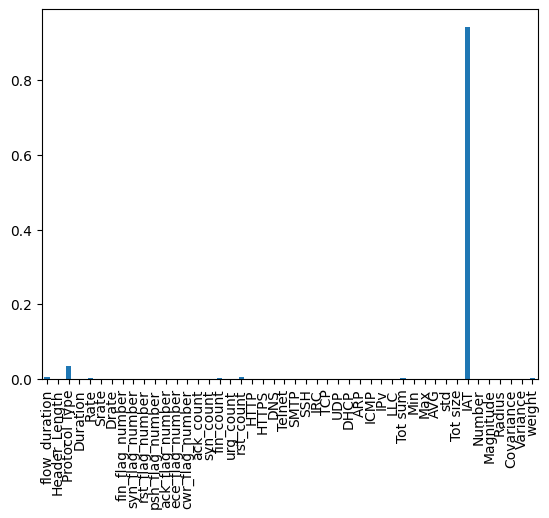

In [ ]:
feat_imp = pd.DataFrame(best_estimator_tree.feature_importances_ , index=df.drop('label' , axis = 1).columns)
feat_imp.plot.bar(legend=False);

## Random forest algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest classifer object
rlf = RandomForestClassifier(min_samples_split = 20, max_depth = 50, n_estimators= 2)

# Train Decision Tree Classifer
rlf = rlf.fit(X_train,y_train)

#Predict the response for train dataset
y_train_pred = rlf.predict(X_train)

In [ ]:
from sklearn.metrics import classification_report

# y_true is the true labels of the test set
# y_pred is the predicted labels of the test set
print(classification_report(y_train , y_train_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      4482
           1       1.00      1.00      1.00    138909
           2       1.00      1.00      1.00     33140
           3       0.81      0.72      0.76      1311
           4       0.98      0.97      0.97     13107

    accuracy                           0.99    190949
   macro avg       0.94      0.93      0.93    190949
weighted avg       0.99      0.99      0.99    190949



In [ ]:
from sklearn.metrics import classification_report

# y_true is the true labels of the test set
# y_pred is the predicted labels of the test set
print(classification_report(y_test , y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1118
           1       1.00      1.00      1.00     34868
           2       1.00      1.00      1.00      8136
           3       0.87      0.76      0.81       339
           4       0.98      0.97      0.97      3277

    accuracy                           0.99     47738
   macro avg       0.95      0.94      0.94     47738
weighted avg       0.99      0.99      0.99     47738



In [ ]:
#New and replace
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': list(range(5,21, 5)),
    'max_depth': list(range(4, 21, 4)),
    'min_samples_split': [10, 20, 30, 40, 50],
    # Add other hyperparameters and their ranges as needed
}
random_search_forest = RandomizedSearchCV(
    estimator=RandomForestClassifier(),  # Replace with your chosen algorithm
    param_distributions=param_grid,
    cv=5,  # Number of folds for cross-validation
    scoring='f1_macro',  # Replace with an appropriate scoring metric
    verbose=2,  # Increase for more verbose output (optional)
    n_jobs=-1,  # Use all available CPU cores (optional)
)
random_search_forest.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [4, 8, 12, 16, 20],
                                        'min_samples_split': [10, 20, 30, 40,
                                                              50],
                                        'n_estimators': [5, 10, 15, 20]},
                   scoring='f1_macro', verbose=2)

## Hyperparamter Tuning

In [ ]:
pd.DataFrame(random_search_forest.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.368234,0.986741,0.109520,0.036778,15,20,4,"{'n_estimators': 15, 'min_samples_split': 20, ...",0.691104,0.736638,0.701935,0.732562,0.732188,0.718886,0.018646,9
1,3.517584,0.647137,0.154201,0.052913,20,40,4,"{'n_estimators': 20, 'min_samples_split': 40, ...",0.735588,0.750133,0.732158,0.739090,0.734333,0.738260,0.006348,8
2,5.109013,0.597332,0.209559,0.163865,15,40,20,"{'n_estimators': 15, 'min_samples_split': 40, ...",0.910509,0.916792,0.914694,0.913751,0.921726,0.915495,0.003716,2
3,3.736920,1.043557,0.098789,0.009544,10,50,16,"{'n_estimators': 10, 'min_samples_split': 50, ...",0.890078,0.916770,0.918694,0.899321,0.919053,0.908783,0.011890,5
4,3.941578,1.049484,0.105490,0.010327,10,40,16,"{'n_estimators': 10, 'min_samples_split': 40, ...",0.914342,0.923566,0.914146,0.913415,0.910625,0.915219,0.004380,3
5,1.620911,0.113960,0.065102,0.003535,5,40,20,"{'n_estimators': 5, 'min_samples_split': 40, '...",0.890962,0.919699,0.902384,0.913898,0.898646,0.905118,0.010387,6
6,5.370601,0.877602,0.171994,0.059007,15,40,12,"{'n_estimators': 15, 'min_samples_split': 40, ...",0.900068,0.918137,0.915340,0.906611,0.909172,0.909866,0.006410,4
7,5.353280,1.128291,0.160680,0.058790,15,20,16,"{'n_estimators': 15, 'min_samples_split': 20, ...",0.915490,0.928749,0.924297,0.922702,0.922500,0.922748,0.004270,1
8,0.889178,0.039549,0.052902,0.003644,5,10,4,"{'n_estimators': 5, 'min_samples_split': 10, '...",0.750361,0.757139,0.637947,0.612417,0.661846,0.683942,0.059142,10
9,5.338897,1.374169,0.128075,0.020192,20,50,8,"{'n_estimators': 20, 'min_samples_split': 50, ...",0.866810,0.893698,0.876243,0.870610,0.883269,0.878126,0.009561,7


In [ ]:
best_estimator_forest = random_search_forest.best_estimator_

In [ ]:
y_train_pred = best_estimator_forest.predict(X_train)
print(classification_report(y_train , y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      4482
           1       1.00      1.00      1.00    138909
           2       1.00      1.00      1.00     33140
           3       0.96      0.79      0.87      1311
           4       0.99      0.98      0.99     13107

    accuracy                           1.00    190949
   macro avg       0.97      0.95      0.96    190949
weighted avg       1.00      1.00      1.00    190949



In [ ]:
y_test_pred = best_estimator_forest.predict(X_test)
print(classification_report(y_test , y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1118
           1       1.00      1.00      1.00     34868
           2       1.00      1.00      1.00      8136
           3       0.87      0.63      0.74       339
           4       0.97      0.97      0.97      3277

    accuracy                           0.99     47738
   macro avg       0.95      0.91      0.92     47738
weighted avg       0.99      0.99      0.99     47738



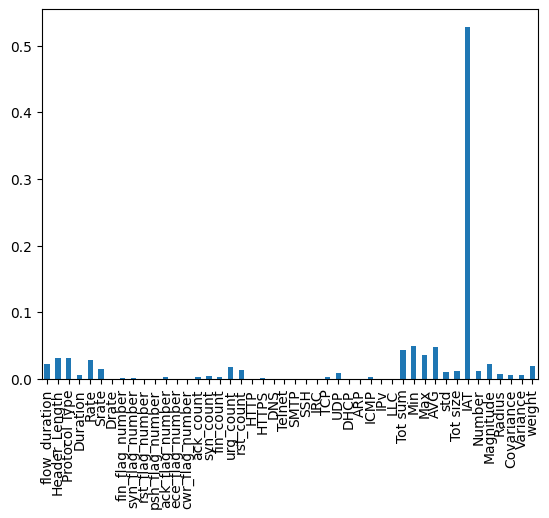

In [ ]:
feat_imp = pd.DataFrame(best_estimator_forest.feature_importances_ , index=df.drop('label' , axis = 1).columns)
feat_imp.plot.bar(legend=False);